
# Hollow Core in infinite glass with Perfectly Conducting Boundary Conditions

N0 Configuration in Bird but now with PCB

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [3]:
A = BraggExact(ts=[15e-6,15e-6], mats=['air', 'glass'], 
               ns=[lambda x:n_air, lambda x:n_glass],
              maxhs=[.2,.02], wl=1.8e-6)


In [4]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [5]:
k_low = A.k0 * A.ns[0] * A.scale
outer = 'pcb'
nu = 1

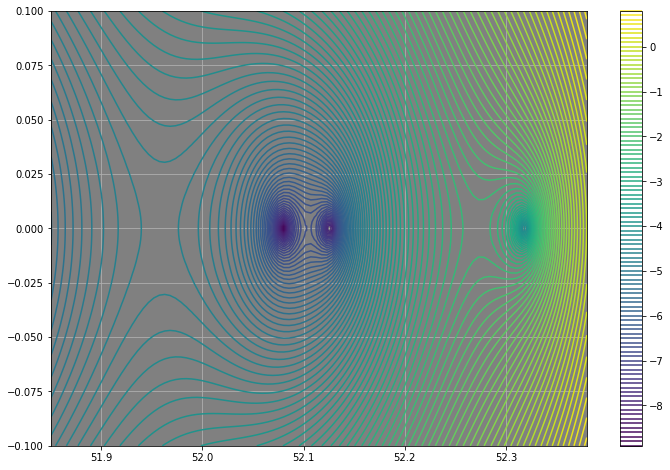

In [8]:
plotlogf(A.determinant, .99*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

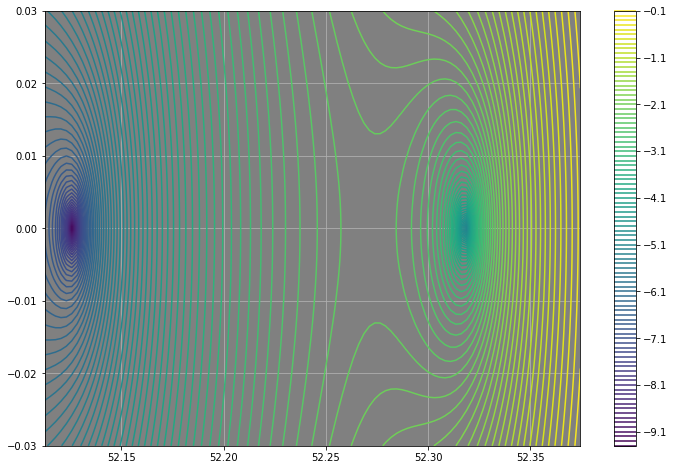

In [9]:
plotlogf(A.determinant, .995*k_low, k_low, -.03,.03, nu, outer,
         iref=100, rref=100, levels=100)

In [10]:
guess = np.array(.999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.31789400396009+1.7511909980111474e-18j) . Residual of determinant:  3.431284038657745e-14


# Bragg Exact Fields

In [11]:
Fs = A.all_fields(beta1, nu, outer)

In [12]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [15]:
Draw(Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [13]:
Draw(Fs['Etv'].Norm(), A.mesh)


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [15]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Hphi'], A.mesh)

In [16]:
Draw(Fs['Er'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [18]:
Draw(Fs['Hr'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

# Add in Loss in Cladding

In [43]:
n_air = 1.00027717
n_glass = 1.4388164768221814 - .09j

In [44]:
A = BraggExact(ts=[15e-6,15e-6], mats=['air', 'glass'], 
               ns=[lambda x:n_air, lambda x:n_glass],
              maxhs=[.2,.02], wl=1.8e-6)


In [45]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [46]:
k_low = (A.k0 * A.ns[0] * A.scale).real
outer = 'pcb'
nu = 1

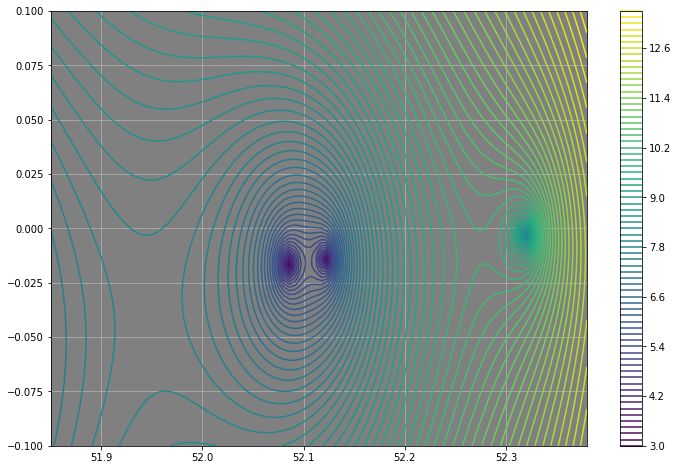

In [47]:
plotlogf(A.determinant, .99*k_low, 1.0001*k_low, -.1,.1, nu, outer,
         iref=100, rref=100, levels=100)

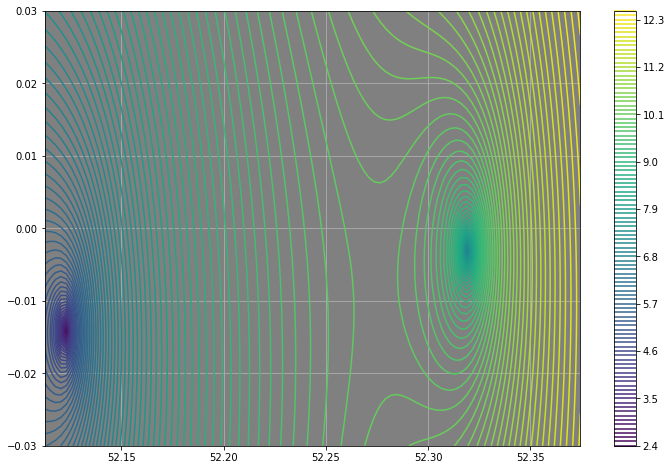

In [48]:
plotlogf(A.determinant, .995*k_low, k_low, -.03,.03, nu, outer,
         iref=100, rref=100, levels=100)

In [49]:
guess = np.array(.999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (52.319406108480415-0.0030923869941081685j) . Residual of determinant:  1.88862445492828e-07


# Bragg Exact Fields

In [50]:
Fs = A.all_fields(beta1, nu, outer)

In [51]:
Draw(Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [15]:
Draw(Fs['Hz'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [32]:
Draw(Fs['Etv'].Norm(), A.mesh)


WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [33]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Hphi'], A.mesh)

In [16]:
Draw(Fs['Er'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [18]:
Draw(Fs['Hr'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene